<a href="https://colab.research.google.com/github/zzzzzssyy/ECON3916-33674-Statistical-Machine-Learning/blob/main/Assignment%202/Assignment%202%3A%20The%20Algorithmic%20Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
normal_traffic = np.random.randint(20,50,980)
spike_traffic = np.random.randint(1000,5000,20)
latency_logs = np.concatenate((normal_traffic,spike_traffic))

print(f"Total Requestes:{len(latency_logs)}")
print(f"Mean Latency:{np.mean(latency_logs):.2f}ms")
print(f"Median Latency:{np.median(latency_logs):.2f}ms")

Total Requestes:1000
Mean Latency:103.61ms
Median Latency:35.00ms


Phase 2

In [21]:
def calculate_mad(data):
    median = np.median(data)
    absolut_deviations = np.abs(data-median)
    return np.median(absolut_deviations)

sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print(f"Standard Deviation:{sd:.2f}ms")
print(f"Median Absolute Deviation:{mad:.2f}ms")

Standard Deviation:509.49ms
Median Absolute Deviation:8.00ms


In [22]:
def baysian_audit(prior, sensitivity, specifiticity):
  p_flagged = sensitivity * prior +(1-specifiticity)*(1-prior)
  posterior = (sensitivity*prior)/p_flagged
  return posterior

post_a = baysian_audit(0.50, 0.98, 0.98)
print(f"Scenario A (Bootcamp): {post_a:.4f}")
post_b = baysian_audit(0.05, 0.99, 0.98)
print(f"Scenario B (Econ Class): {post_b:.4f}")
post_c = baysian_audit(0.001, 0.98, 0.98)
print(f"Scenario C (Honors Seminar): {post_c:.4f}")

Scenario A (Bootcamp): 0.9800
Scenario B (Econ Class): 0.7226
Scenario C (Honors Seminar): 0.0468


Phase 3

In [26]:
observed = np.array([50250,49750])
expected = np.array([50000,50000])

chi_square = 0
for i in range(len(observed)):
  chi_square += (observed[i]-expected[i])**2/expected[i]

print(f"Chi-Square Statistic: {chi_square:.4f}")
print(f"Critical Value (p<0.05):3.84")

if chi_square > 3.84:
  print("INVALID: SRM Detected (p < 0.05). Engineering bias suspected.")
else:
  print("Valid: Varianceis whthin natural limits")

Chi-Square Statistic: 2.5000
Critical Value (p<0.05):3.84
Valid: Varianceis whthin natural limits


AI Expansion

Total Tokens (The Graveyard): 10000
Survivors (Top 1%): 100

Mean Market Cap (ALL): $6,960.54
Mean Market Cap (Survivors Only): $358,555.75

Survivorship Bias: If you only see the Top 1%, you think crypto is easy money.
Reality: 99% of tokens are near zero.


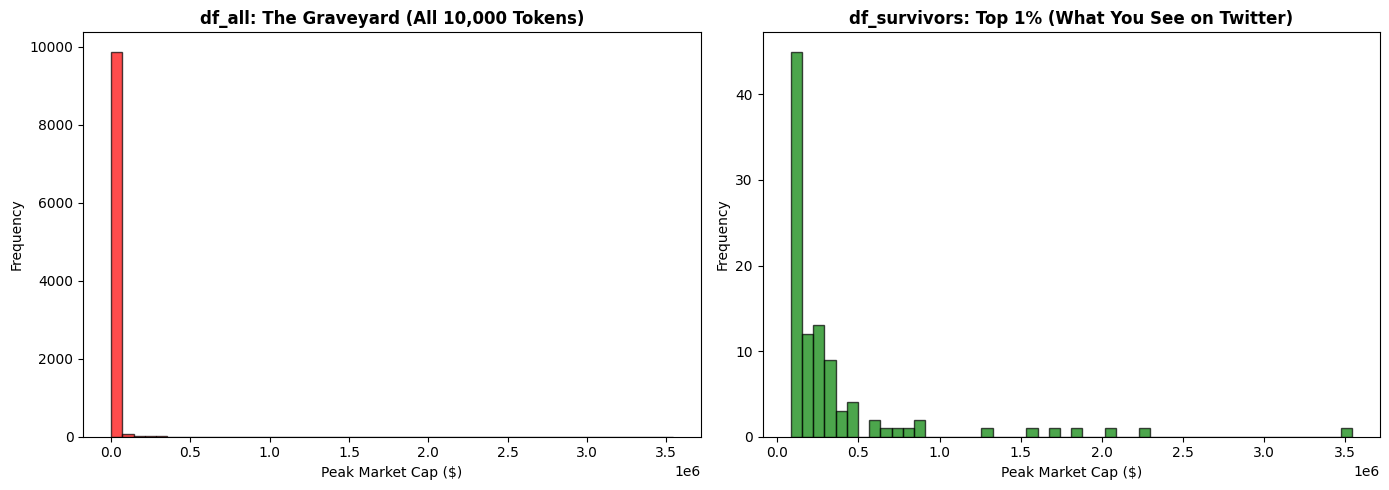

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate 10,000 token launches using Pareto Distribution (Power Law)
# Shape=1 makes it extremely skewed — 99% near zero
np.random.seed(42)
peak_market_cap = np.random.pareto(a=1, size=10000) * 1000

# Create two DataFrames
df_all = pd.DataFrame({'PeakMarketCap': peak_market_cap})

# Top 1% = The Survivors (what platforms show you)
threshold = df_all['PeakMarketCap'].quantile(0.99)
df_survivors = df_all[df_all['PeakMarketCap'] >= threshold].copy()

print(f"Total Tokens (The Graveyard): {len(df_all)}")
print(f"Survivors (Top 1%): {len(df_survivors)}")
print()
print(f"Mean Market Cap (ALL): ${df_all['PeakMarketCap'].mean():,.2f}")
print(f"Mean Market Cap (Survivors Only): ${df_survivors['PeakMarketCap'].mean():,.2f}")
print()
print("Survivorship Bias: If you only see the Top 1%, you think crypto is easy money.")
print("Reality: 99% of tokens are near zero.")

# Dual Histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df_all['PeakMarketCap'], bins=50, color='red', edgecolor='black', alpha=0.7)
axes[0].set_title('df_all: The Graveyard (All 10,000 Tokens)', fontweight='bold')
axes[0].set_xlabel('Peak Market Cap ($)')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_survivors['PeakMarketCap'], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[1].set_title('df_survivors: Top 1% (What You See on Twitter)', fontweight='bold')
axes[1].set_xlabel('Peak Market Cap ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()